# Question #2

## 1.

In [1]:
from wholesale_customers import *

In [2]:
df = read_csv_2("wholesale_customers.csv")
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [3]:
summary_statistics(df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
std,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
min,3.0,55.0,3.0,25.0,3.0,3.0
max,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


## 2.

In [4]:
standardize(df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
...,...,...,...,...,...,...
435,1.399719,0.847482,0.849793,2.072862,-0.566186,0.240817
436,2.152842,-0.591469,-0.756304,0.296223,-0.584853,0.291170
437,0.200098,1.313176,2.345716,-0.542762,2.508362,0.121318
438,-0.135230,-0.516947,-0.601829,-0.418964,-0.569122,0.212804


In [3]:
rdf = cluster_evaluation(df)

/Users/ahmetcinci/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ahmetcinci/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ahmetcinci/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ahmetcinci/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/sklearn/clus

In [4]:
rdf.sort_values(by="Silhouette Score", ascending=False)

,Algorithm,data,k,run,Silhouette Score
33,Kmeans,Standardized,3,1.0,0.548287
41,Kmeans,Standardized,3,9.0,0.548287
37,Kmeans,Standardized,3,5.0,0.544051
40,Kmeans,Standardized,3,8.0,0.543544
35,Kmeans,Standardized,3,3.0,0.538366
...,...,...,...,...,...
32,Agglomerative,Original,10,NaN,0.290893
58,Kmeans,Standardized,10,6.0,0.288416
65,Agglomerative,Standardized,10,NaN,0.279543
63,Agglomerative,Standardized,3,NaN,0.264609


In [5]:
best_clustering_score(rdf)

Algorithm                 Kmeans
data                Standardized
k                              3
run                          1.0
Silhouette Score        0.548287
Name: 33, dtype: object


0.5482872649700601

/Users/ahmetcinci/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


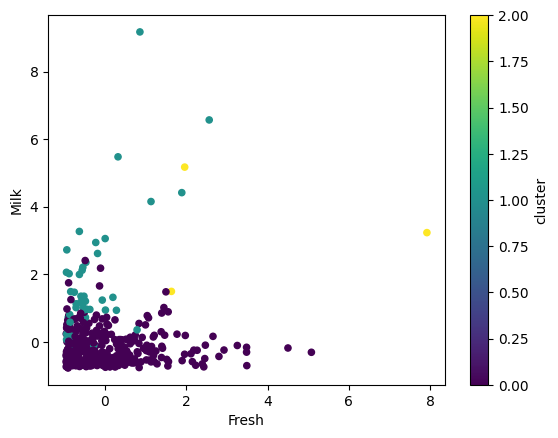

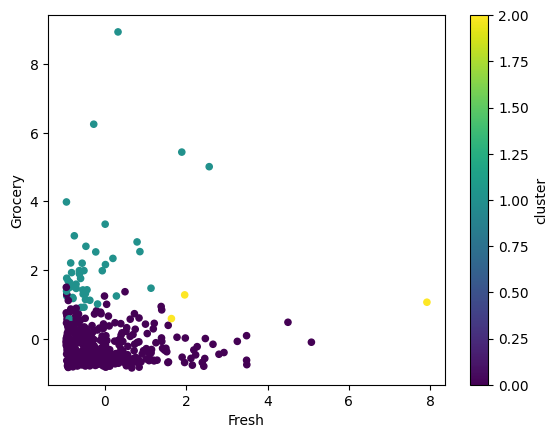

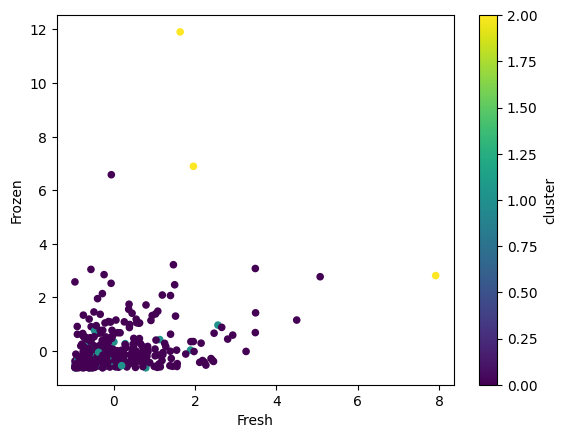

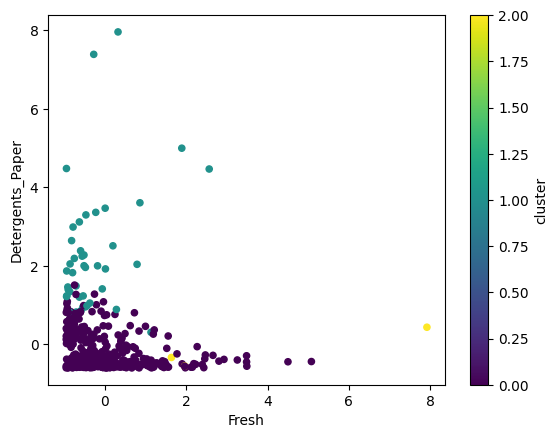

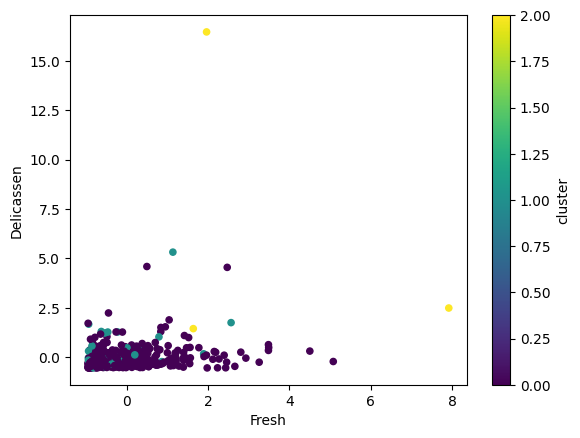

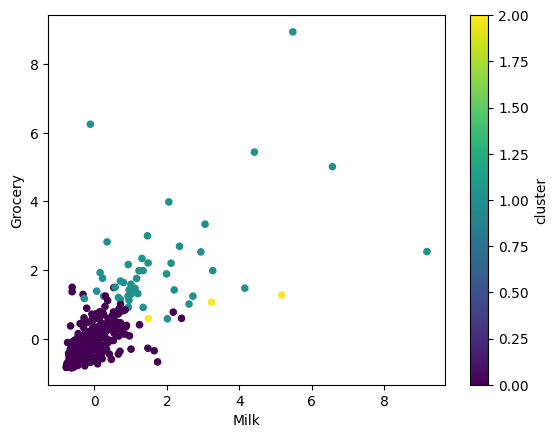

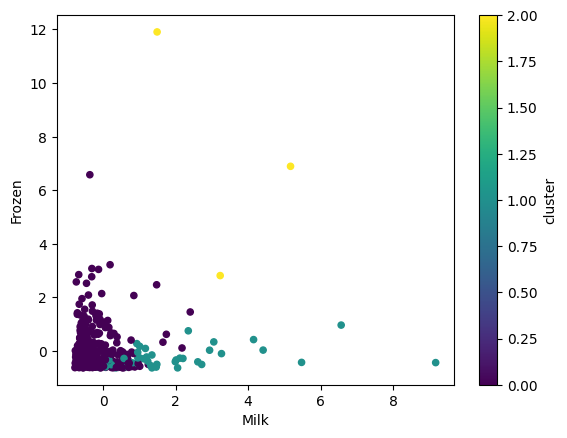

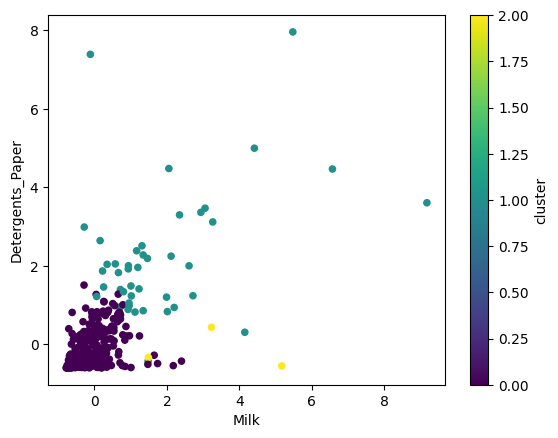

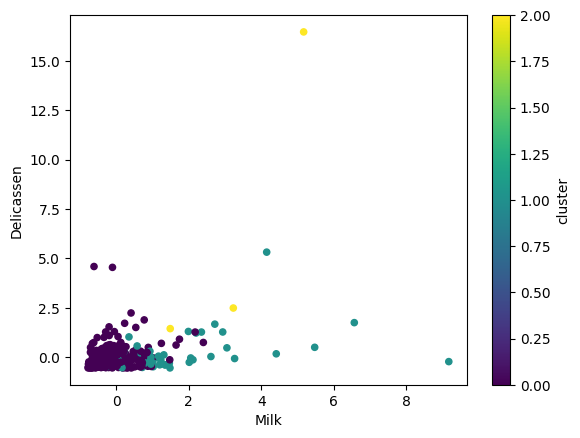

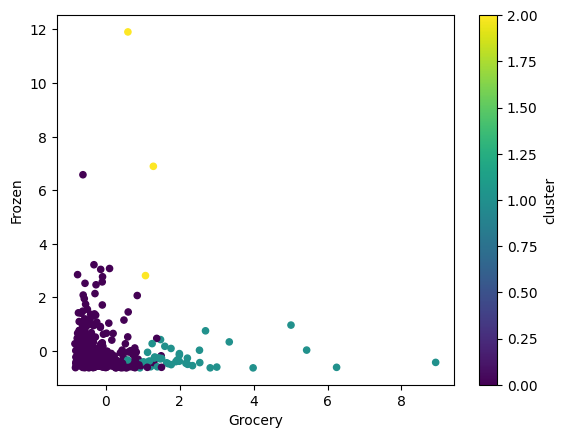

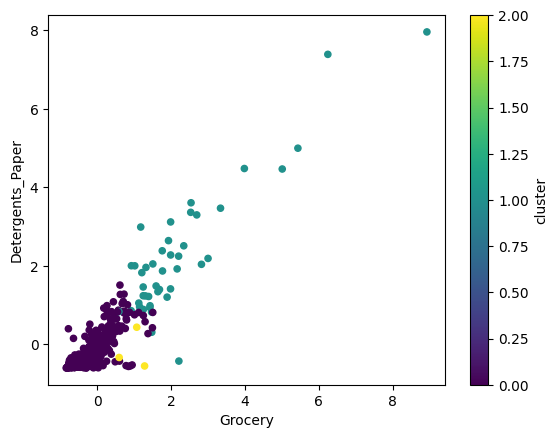

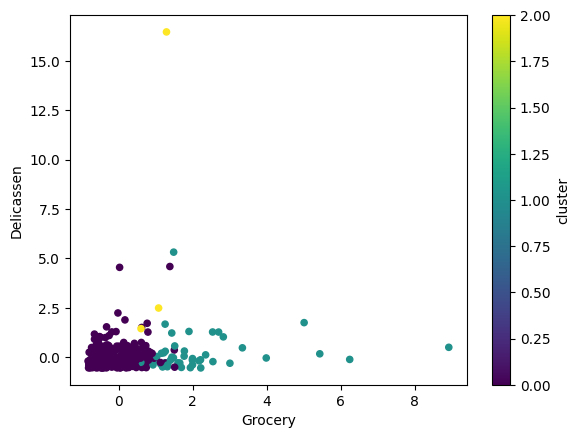

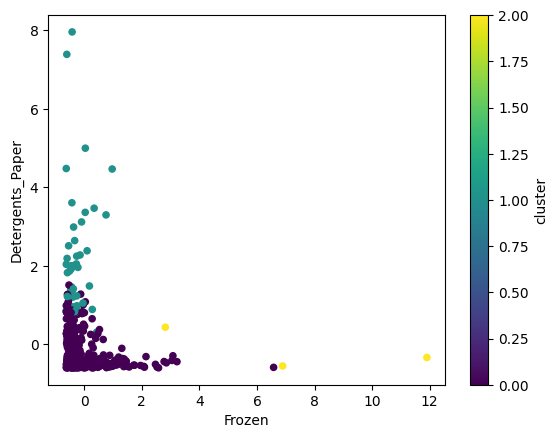

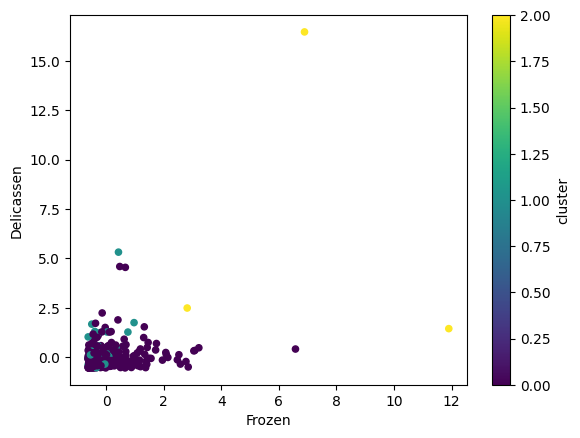

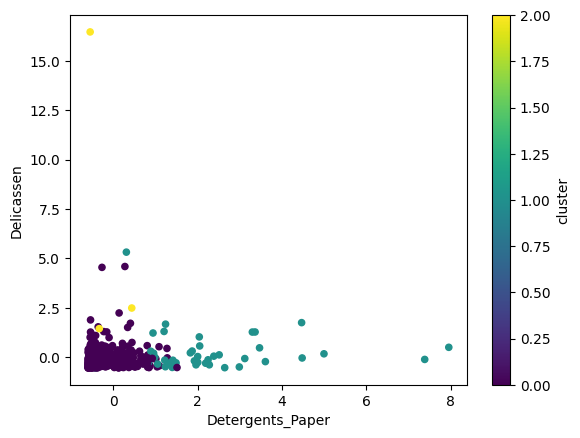

In [6]:
scatter_plots(df)